**Advanced Machine Learning | SciPy Japan 2019 Tutorial | Alexandre Chabot-Lerclerc**
<br>
SRC : https://www.youtube.com/watch?v=4H7kg2l4lD8&feature=youtu.be&t=117

In [22]:
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [5]:
model = LinearSVC()
model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
model.score(iris.data,iris.target)

0.9666666666666667

In [10]:
model = LogisticRegression()
model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
model.score(iris.data,iris.target)

0.96

In [15]:
errors = iris.target!=predicted

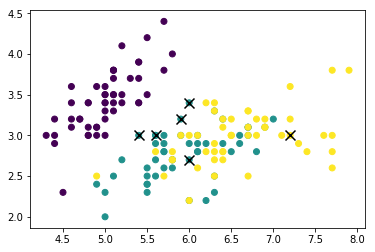

In [19]:
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.scatter(iris.data[errors,0],iris.data[errors,1],marker='x', c='black',s=100)
plt.show()

### Pipeline

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


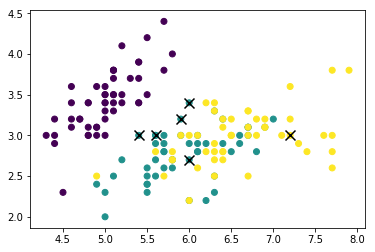

In [21]:
model = Pipeline([('clf',LogisticRegression())])

model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

errors = iris.target!=predicted

plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.scatter(iris.data[errors,0],iris.data[errors,1],marker='x', c='black',s=100)
plt.show()

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


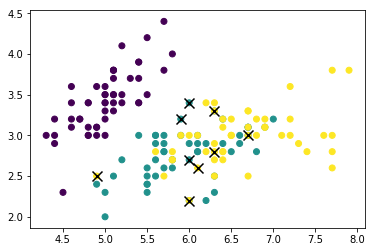

In [24]:
model = Pipeline([
    ('scalar',StandardScaler()),
    ('clf',LogisticRegression(penalty='l1'))
])

model.fit(iris.data,iris.target)
predicted = model.predict(iris.data)

errors = iris.target!=predicted

plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.scatter(iris.data[errors,0],iris.data[errors,1],marker='x', c='black',s=100)
plt.show()